In [1]:
from expander import *
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize
from random import uniform
from mpl_toolkits.mplot3d import Axes3D


plt.rcParams["figure.figsize"] = (15, 15)

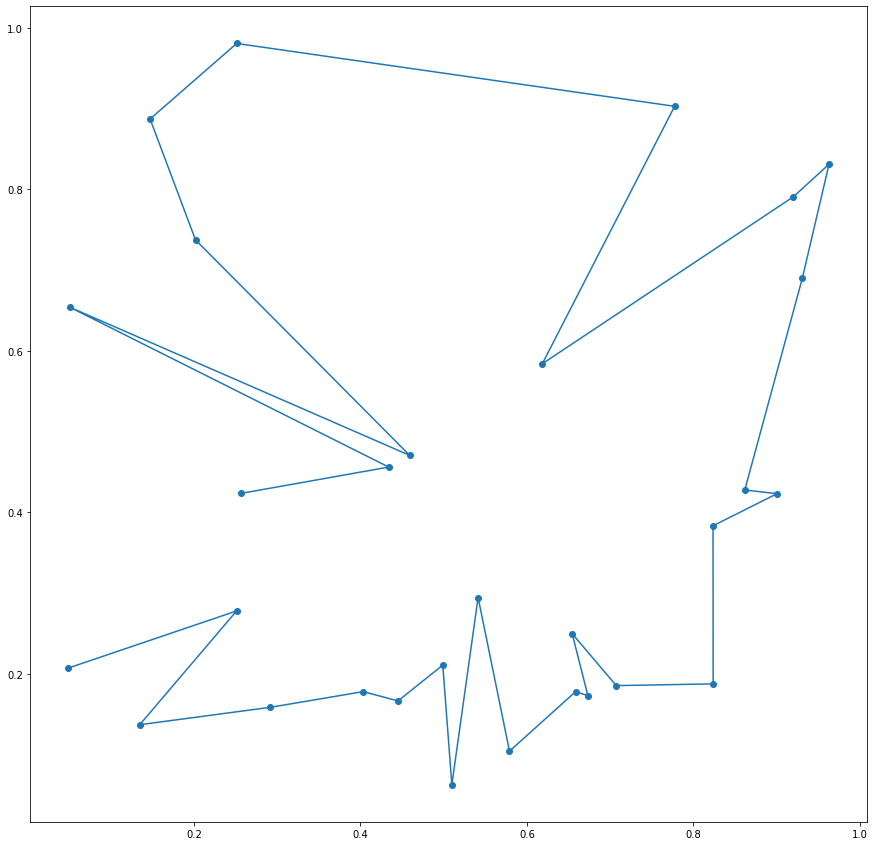

In [76]:
# generate a polygonal chain
coords = polygon(30)

# plot it
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

# get total chord length
lengths, max_l = max_chord_length(coords, return_list=True)
agg_lengths = compute_agg_lengths(lengths)

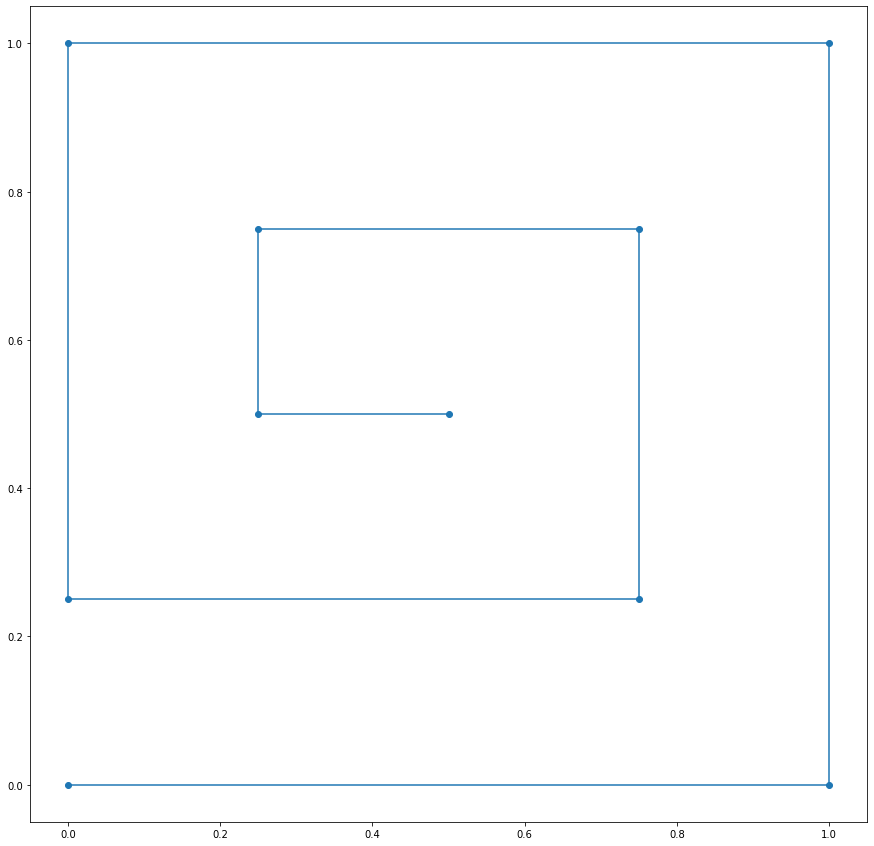

In [81]:
coords=spiral(1/4)
# plot it
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

# get total chord length
lengths, max_l = max_chord_length(coords, return_list=True)
agg_lengths = compute_agg_lengths(lengths)

In [100]:
# objective function
def fun(x):
    a=x[0]
    b=x[1]
    if a>=b:
        return float('inf')
    return max(-max_l+b-a, -b+a)/(np.linalg.norm(gamma(coords, b, agg_lengths) - gamma(coords, a, agg_lengths)))

# x0=[uniform(0, max_l), uniform(0, max_l)]
x0=[0,max_l*.99]
bnd = [(0,max_l),(0,max_l)]
start = time.time()

# res = scipy.optimize.basinhopping(fun, x0, niter=100, T=1.0, stepsize=0.5)
# res = scipy.optimize.differential_evolution(fun, bounds=bnd, tol=1e-11)
# res = scipy.optimize.dual_annealing(fun, bounds=bnd, maxiter=2000, initial_temp=2e4, visit=2.9)
# res = scipy.optimize.direct(fun, bounds=bnd, eps=0.0001)
rranges = (slice(0, max_l, max_l/100), slice(0, max_l, max_l/100))

res = scipy.optimize.brute(fun, rranges, full_output=True,
                          finish=scipy.optimize.fmin)

end = time.time()
print(f'{end - start:.2f} s')
res

0.11 s


(array([1.41522996, 4.64250269]),
 -11.04536101718726,
 array([[[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
         [0.06, 0.06, 0.06, ..., 0.06, 0.06, 0.06],
         [0.12, 0.12, 0.12, ..., 0.12, 0.12, 0.12],
         ...,
         [5.82, 5.82, 5.82, ..., 5.82, 5.82, 5.82],
         [5.88, 5.88, 5.88, ..., 5.88, 5.88, 5.88],
         [5.94, 5.94, 5.94, ..., 5.94, 5.94, 5.94]],
 
        [[0.  , 0.06, 0.12, ..., 5.82, 5.88, 5.94],
         [0.  , 0.06, 0.12, ..., 5.82, 5.88, 5.94],
         [0.  , 0.06, 0.12, ..., 5.82, 5.88, 5.94],
         ...,
         [0.  , 0.06, 0.12, ..., 5.82, 5.88, 5.94],
         [0.  , 0.06, 0.12, ..., 5.82, 5.88, 5.94],
         [0.  , 0.06, 0.12, ..., 5.82, 5.88, 5.94]]]),
 array([[        inf, -1.        , -1.        , ..., -0.3032177 ,
         -0.19107893, -0.09008562],
        [        inf,         inf, -1.        , ..., -0.42586406,
         -0.3032177 , -0.19107893],
        [        inf,         inf,         inf, ..., -0.55708601,
         -0.42586

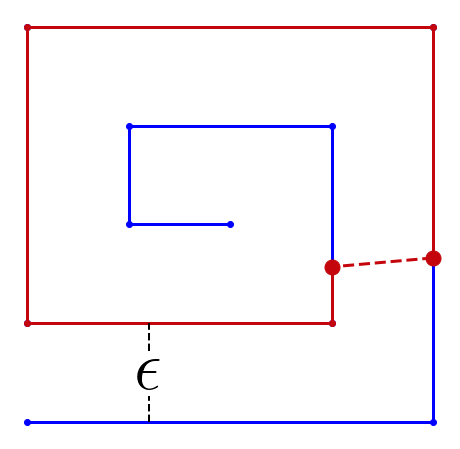

In [166]:
plt.rcParams["text.usetex"] =True

fig, ax = plt.subplots()
ax.axis('off')
fig.patch.set_visible(False)
plt.rcParams["figure.figsize"] = (8, 8)
# plot the 2 points that attain the maximum Chord Arc Constant
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o', linewidth=3, c='#0000ff')

# point1 = gamma(coords, res.x[0])
# point2 = gamma(coords, res.x[1])
point1 = gamma(coords, res[0][0])
point2 = gamma(coords, res[0][1])

plt.plot(point1[0],point1[1], '-o', c='#c5050c', markersize=15)
plt.plot(point2[0],point2[1], '-o', c='#c5050c', markersize=15)

i = get_edge_ind(agg_lengths,res[0][0])
j = get_edge_ind(agg_lengths,res[0][1])
my_list = [point1]
my_list.extend(coords[i+1:j+1])
my_list.extend([np.array(point2)])

plt.plot([i[0] for i in my_list[:]],[i[1] for i in my_list[:]], '-o', c='#c5050c', linewidth=3)

# ax.plot(point1[0],point1[1], '-o', c='r', markersize=15)
# ax.plot(point2[0],point2[1], '-o', c='r', markersize=15)

plt.plot([point1[0],point2[0]], [point1[1],point2[1]], '#c5050c', linestyle="--", linewidth=3)

plt.annotate('$\epsilon$', xy =(0.27, 0.082), fontsize=70)
plt.plot([0.3,0.3], [0,0.065], 'k', linestyle="--", linewidth=2)
plt.plot([0.3,0.3], [0.18,0.25], 'k', linestyle="--", linewidth=2)


plt.savefig('spiral.png', dpi=300)

In [106]:
my_list

[array([1.        , 0.41522996]),
 array([1., 1.]),
 array([0., 1.]),
 array([0.  , 0.25]),
 array([0.75, 0.25]),
 array([0.75      , 0.39250269])]

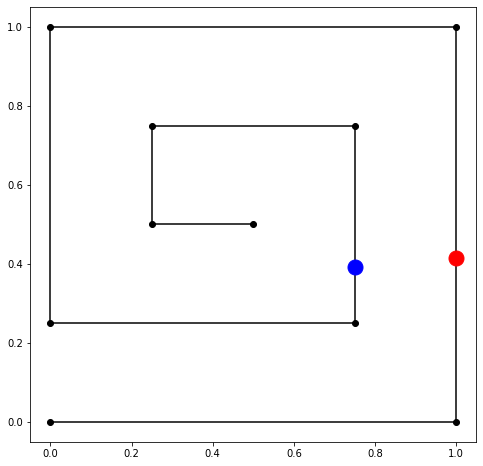

In [101]:
plt.rcParams["figure.figsize"] = (8, 8)
# plot the 2 points that attain the maximum Chord Arc Constant
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o', c='k')

# point1 = gamma(coords, res.x[0])
# point2 = gamma(coords, res.x[1])
point1 = gamma(coords, res[0][0])
point2 = gamma(coords, res[0][1])

plt.plot(point1[0],point1[1], '-o', c='r', markersize=15)
plt.plot(point2[0],point2[1], '-o', c='b', markersize=15)

In [79]:
def obj(x):
    a=x[0]
    b=x[1]
    return min(max_l-b+a, b-a)/(np.linalg.norm(gamma(coords, b, agg_lengths) - gamma(coords, a, agg_lengths)))
plt.rcParams["figure.figsize"] = (15, 15)

a = np.arange(0, max_l, max_l/600)
b = np.arange(0, max_l, max_l/600)

A, B = np.meshgrid(a, b)
nu = np.zeros((len(a),len(a)))

for i in range(len(nu)):
    for j in range(i):
        nu[i][j] = None
    for j in range(i, len(nu[i])):
        nu[i][j] = obj([a[i],b[j]])

# np.sqrt( 1 + (2*D*B)**2 ) / np.sqrt( (1-B**2)**2 + (2*D*B)**2)

/var/folders/sh/gj_9n4p54291vk7mp4m3lxb80000gn/T/ipykernel_15016/919623132.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return min(max_l-b+a, b-a)/(np.linalg.norm(gamma(coords, b, agg_lengths) - gamma(coords, a, agg_lengths)))


/var/folders/sh/gj_9n4p54291vk7mp4m3lxb80000gn/T/ipykernel_15016/459459305.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
/var/folders/sh/gj_9n4p54291vk7mp4m3lxb80000gn/T/ipykernel_15016/459459305.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(A, B, nu)


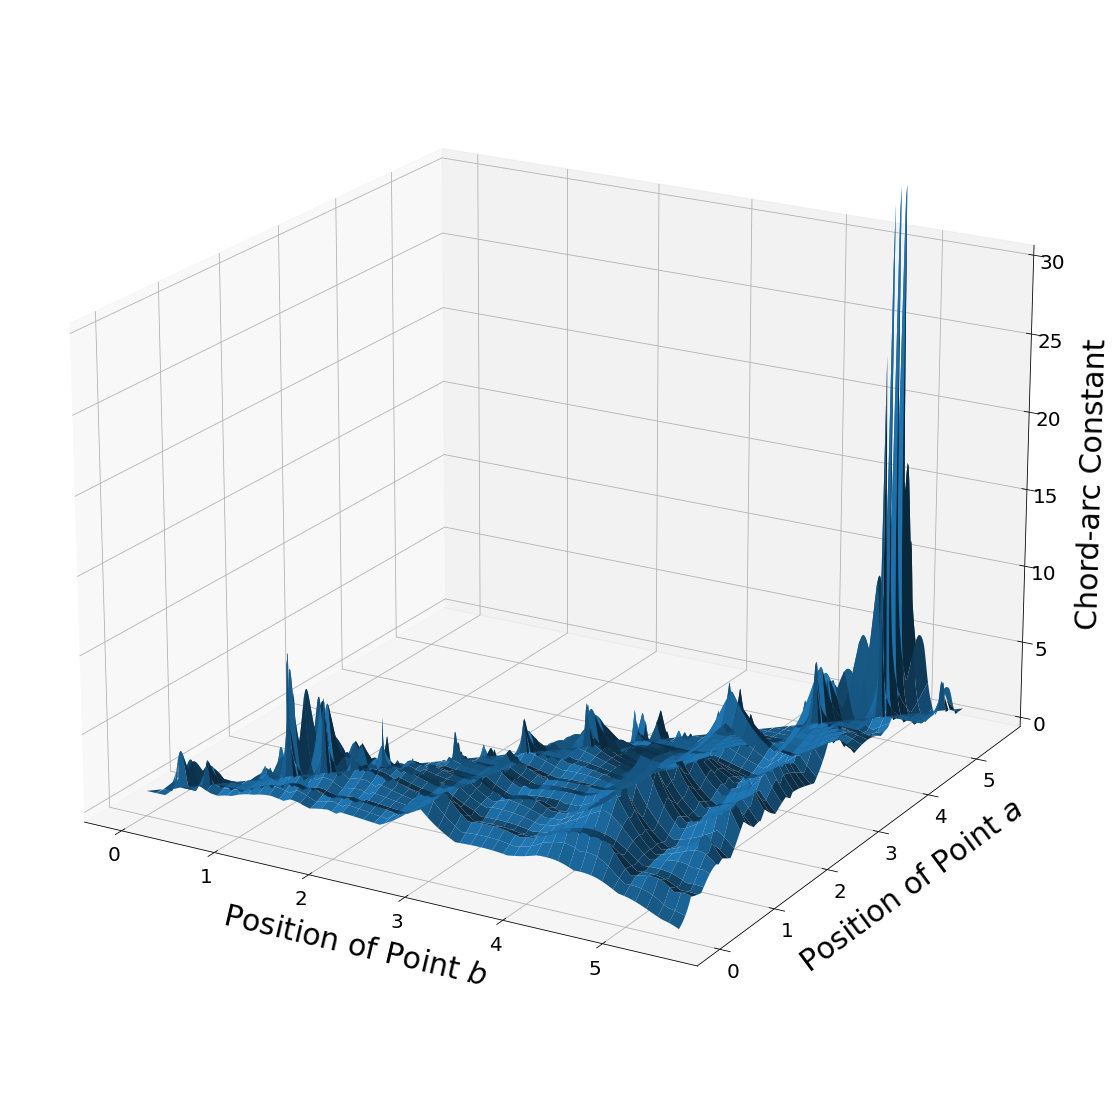

In [80]:
fig = plt.figure()

ax = Axes3D(fig)
ax.plot_surface(A, B, nu)
_=plt.xlabel('Position of Point $b$', fontsize=30, labelpad=20)
# _=plt.ylabel('Position of Point $a$', fontsize=30, labelpad=20)
_=ax.set_ylabel('Position of Point $a$', fontsize=30, labelpad=20)
_=ax.set_zlabel('Chord-arc Constant', fontsize=30, labelpad=20)
_=plt.xticks(fontsize=20)
_=plt.yticks(fontsize=20)
# _=ax.set_zticks(30)
_=ax.zaxis.set_tick_params(labelsize=20)
ax.set_zlim(0,30)
ax.view_init(20)
plt.show()
# fig.savefig('opt_3d.png', dpi=300, bbox_inches='tight')

In [5]:
# #################
# # shgo
# #################
# def f(x):
#     return x[1]-x[0]

# cons = ({'type': 'ineq', 'fun': f})

# # objective function
# def fun(x):
#     a=x[0]
#     b=x[1]
#     return (-b+a)/(np.linalg.norm(gamma(coords, b, lengths, max_l) - gamma(coords, a, lengths, max_l)))

# bnd = [(0,max_l),(0,max_l)]
# start = time.time()

# res = scipy.optimize.shgo(f, bounds=bnd, iters=8, constraints=cons)

# end = time.time()
# print(f'{end - start:.2f} s')
# res
# ##################################################3